<a href="https://colab.research.google.com/github/Witcape/AI_Practice/blob/main/graph_rag_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !pip install langchain-experimental langchain-community langchain networkx langchain-google-genai langchain-core json-repair

In [2]:
# import os
# import time
# import networkx as nx
# import google.generativeai as genai
# from langchain_experimental.graph_transformers import LLMGraphTransformer
# from langchain_google_genai import GoogleGenerativeAI
# from langchain.chains import GraphQAChain
# from langchain_core.documents import Document
# from langchain_community.graphs.networkx_graph import NetworkxEntityGraph

In [3]:
# import google.generativeai as genai
# from google.colab import userdata

# GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')
# genai.configure(api_key=GOOGLE_API_KEY)
# llm = GoogleGenerativeAI(model="gemini-pro", google_api_key=GOOGLE_API_KEY)

In [4]:
# # Input text
# doc_text = """
# A traveler, John Doe, lost his black Samsonite suitcase at JFK Airport on February 20th.
# He last saw it at the security checkpoint in Terminal 4 before proceeding to Gate B22 for his flight to London.
# The suitcase contains important documents, a laptop, and personal belongings.
# Airport security reviewed footage from multiple CCTV cameras along the route from security to the boarding gate.
# It was last seen near a coffee shop in the terminal before disappearing from view.
# The airport authorities are investigating whether it was misplaced, stolen, or mistakenly taken by another passenger.
# """

# documents = [Document(page_content=doc_text)]

In [5]:
# # Initialize the Graph Transformer
# llm_transformer = LLMGraphTransformer(llm=llm)
# graph_documents = llm_transformer.convert_to_graph_documents(documents)

# # Filter Graph Transformer
# llm_transformer_filtered = LLMGraphTransformer(
#     llm=llm,
#     allowed_nodes=["Person", "Item", "Location", "Event"],
#     allowed_relationships=["LAST_SEEN_AT", "OWNED_BY", "INVESTIGATED_BY", "RECORDED_BY", "CONNECTED_TO", "CONTAINS"],
# )
# graph_documents_filtered = llm_transformer_filtered.convert_to_graph_documents(documents)

# # Create NetworkX Graph
# graph = NetworkxEntityGraph()

In [6]:
# # Add nodes to the graph
# for node in graph_documents_filtered[0].nodes:
#     graph.add_node(node.id)

# # Add edges to the graph
# for edge in graph_documents_filtered[0].relationships:
#     graph._graph.add_edge(edge.source.id, edge.target.id, relation=edge.type)


In [7]:
# # Initialize the GraphQAChain
# chain = GraphQAChain.from_llm(llm=llm, graph=graph, verbose=True)

In [8]:
# # Query the graph
# question = "Where was john doe's suitcase seen?"
# response = chain.run(question)
# print(response)

In [1]:
!pip install langchain-experimental langchain-community langchain networkx langchain-google-genai langchain-core json-repair matplotlib

In [2]:
import os
import time
import networkx as nx
import requests
import matplotlib.pyplot as plt
import google.generativeai as genai
from langchain_experimental.graph_transformers import LLMGraphTransformer
from langchain_google_genai import GoogleGenerativeAI
from langchain.chains import GraphQAChain  # Fixed import
from langchain_core.documents import Document
from langchain_community.graphs.networkx_graph import NetworkxEntityGraph

In [3]:
import google.generativeai as genai
from google.colab import userdata

GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)
llm = GoogleGenerativeAI(model="gemini-2.0-flash", google_api_key=GOOGLE_API_KEY)

In [4]:
# Input text - Lost suitcase scenario
text = """
A black suitcase was lost at JFK Airport. Last seen at the security checkpoint in Terminal 4 at 3:30 PM
"""

documents = [Document(page_content=text)]

In [5]:
# Initialize the Graph Transformer
llm_transformer = LLMGraphTransformer(llm=llm)
graph_documents = llm_transformer.convert_to_graph_documents(documents)

In [6]:
response = requests.get("http://34.136.67.113:1234/getAllClassNames")
data = response.json()
classNames = data["classNames"]
print("Allowed Class Names:", classNames)

Allowed Class Names: ['arachnid', 'armadillo', 'bear', 'bird', 'bug', 'butterfly', 'cat', 'coral', 'crocodile', 'crustacean', 'dinosaur', 'dog', 'echinoderms', 'ferret', 'fish', 'flower', 'frog', 'fruit', 'fungus', 'hog', 'lizard', 'marine mammals', 'marsupial', 'mollusk', 'mongoose', 'monotreme', 'person', 'plant', 'primate', 'rabbit', 'rodent', 'salamander', 'shark', 'sloth', 'snake', 'trilobite', 'turtle', 'ungulate', 'vegetable', 'wild cat', 'wild dog', 'accessory', 'aircraft', 'ball', 'boat', 'building', 'clothing', 'container', 'cooking', 'decor', 'electronics', 'fence', 'food', 'furniture', 'hat', 'instrument', 'lab equipment', 'other', 'outdoor scene', 'paper', 'sports equipment', 'technology', 'tool', 'toy', 'train', 'vehicle', 'weapon']


In [7]:
# llm_transformer_filtered = LLMGraphTransformer(
#     llm=llm,
#     allowed_nodes=classNames,
# )
# graph_documents_filtered = llm_transformer_filtered.convert_to_graph_documents(documents)

In [8]:
# Create NetworkX Graph
graph = NetworkxEntityGraph()

In [16]:
# # Manually add nodes and edges
# for doc in graph_documents_filtered:
#     for node in doc.nodes:
#         graph._graph.add_node(node.id, type=node.type)
#     for edge in doc.relationships:
#         graph._graph.add_edge(edge.source?.id, edge.target.id, relation=edge.type)

In [10]:
# AUTOMATIC NODE GEN

for doc in graph_documents:
    for node in doc.nodes:
        graph._graph.add_node(node.id, label=node.type)
    for edge in doc.relationships:
        graph._graph.add_edge(edge.source.id, edge.target.id, relation=edge.type)

In [11]:
# Debug: Print extracted graph structure
print("\nExtracted Graph Documents:\n", graph_documents)
print("\nGenerated Graph Nodes:", graph._graph.nodes(data=True))
print("\nGenerated Graph Edges:", graph._graph.edges(data=True))
# {
#   "embedding": [0.4, 0.5, 0.6],
#   "metadata": {"color": "black", "material": "steel"},
#   "image": "/images/hammer_003.jpg"
# }




Extracted Graph Documents:
 [GraphDocument(nodes=[Node(id='black suitcase', type='Object', properties={}), Node(id='security checkpoint', type='Location', properties={}), Node(id='JFK Airport', type='Location', properties={}), Node(id='Terminal 4', type='Location', properties={})], relationships=[Relationship(source=Node(id='black suitcase', type='Object', properties={}), target=Node(id='JFK Airport', type='Location', properties={}), type='LOCATED_AT', properties={}), Relationship(source=Node(id='black suitcase', type='Object', properties={}), target=Node(id='security checkpoint', type='Location', properties={}), type='LAST_SEEN_AT', properties={}), Relationship(source=Node(id='security checkpoint', type='Location', properties={}), target=Node(id='Terminal 4', type='Location', properties={}), type='LOCATED_IN', properties={})], source=Document(metadata={}, page_content='\nA black suitcase was lost at JFK Airport. Last seen at the security checkpoint in Terminal 4 at 3:30 PM\n'))]

Gen

In [12]:
# Initialize the GraphQAChain
chain = GraphQAChain.from_llm(llm=llm, graph=graph, verbose=True)

In [20]:
question = f"Based on this, {graph_documents}. Where was the suitcase seen"
response = chain.run(question)
print("\nGraph Query Response:", response)



> Entering new GraphQAChain chain...
Entities Extracted:
JFK Airport, Terminal 4
Full Context:


> Finished chain.

Graph Query Response: The suitcase was last seen at the security checkpoint in Terminal 4.


In [28]:
question = f"Based on {graph_documents}, check for a single best class from {classNames}. If nothing fits perfectly, create one yourself, make it specific"
response_1 = chain.run(question)
print("\nGraph Query Response:", response_1)



> Entering new GraphQAChain chain...
Entities Extracted:
GraphDocument, Node, Object, Location, JFK Airport, Terminal 4, Relationship, Document
Full Context:


> Finished chain.

Graph Query Response: accessory


In [ ]:
question = f"Based on {graph_documents}Choose a single best categories that our item fits in from the the list of {response_1}, if noone fits then choose a name for the category yourself"
response_2 = chain.run(question)
print("\nGraph Query Response:", response_2)

In [29]:
import requests
selectedClassName="paper"
response=requests.get(f"http://34.136.67.113:1234/getCategoriesByClassName?className=Accessory")
data=response.json();
categories = data.get("categories", [])
print(categories)

[]


In [34]:
question = f"Based on {graph_documents} and {response_1} Choose a single best categories that our item fits in from the the list of {categories}, if none fits then make one broad category yourself"
response_3 = chain.run(question)
print("\nGraph Query Response:", response_3)



> Entering new GraphQAChain chain...
Entities Extracted:
JFK Airport, Terminal 4
Full Context:


> Finished chain.

Graph Query Response: Accessory category: Luggage.


In [ ]:
question = f"Based on {graph_documents} and {response_1} Choose a single best categories that our item fits in from the the list of {categories}, if none fits then make one broad category yourself"
response_3 = chain.run(question)
print("\nGraph Query Response:", response_3)

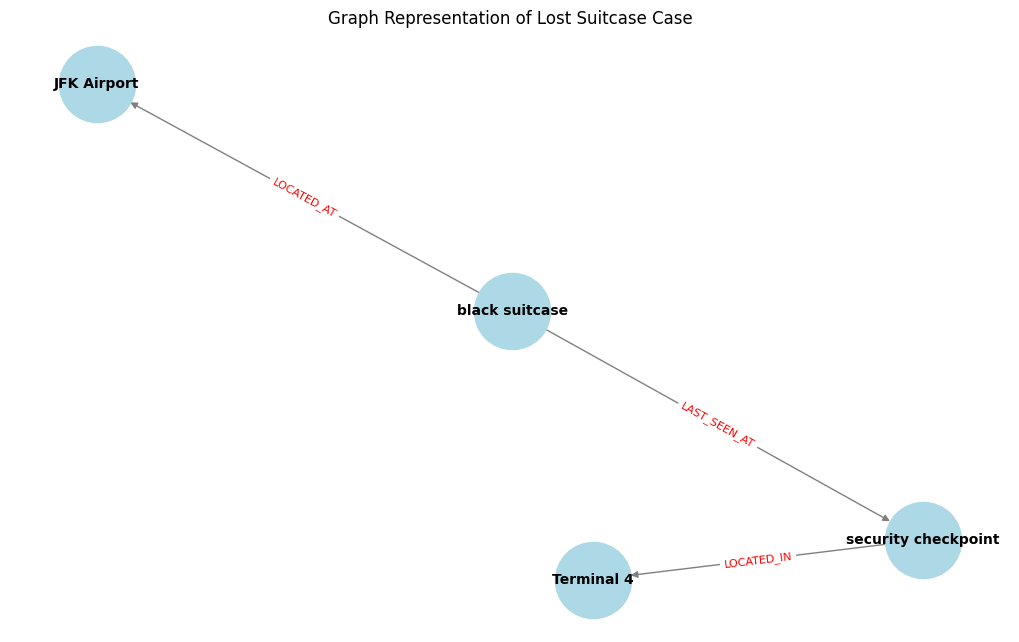

In [14]:
# Visualize the graph
def visualize_graph(graph):
    plt.figure(figsize=(10, 6))
    pos = nx.spring_layout(graph._graph)
    labels = nx.get_edge_attributes(graph._graph, 'relation')
    nx.draw(graph._graph, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=3000, font_size=10, font_weight='bold')
    nx.draw_networkx_edge_labels(graph._graph, pos, edge_labels=labels, font_size=8, font_color='red')
    plt.title("Graph Representation of Lost Suitcase Case")
    plt.show()

# Call visualization function
visualize_graph(graph)

In [25]:
# Improved Input text - Lost suitcase scenario with clearer relationships
doc_text = """
Incident Report: Lost Suitcase at JFK Airport

John Doe, a traveler, reported losing his black Samsonite suitcase at JFK Airport on February 20th at 3:45 PM.
He last physically saw the suitcase at the security checkpoint in Terminal 4 at 3:30 PM before proceeding towards Gate B22 for his flight to London.

The suitcase was recorded on CCTV footage at 3:35 PM near the duty-free store, and at 3:40 PM near a coffee shop in Terminal 4.
At 3:50 PM, security footage showed an unknown individual picking up a suitcase near the coffee shop and walking towards the exit.

The airport authorities and security team are currently investigating the case, reviewing CCTV footage, and checking passenger logs to determine whether it was misplaced, stolen, or mistakenly taken by another passenger.
"""

documents = [Document(page_content=doc_text)]

# Initialize the Graph Transformer
llm_transformer = LLMGraphTransformer(llm=llm)
graph_documents = llm_transformer.convert_to_graph_documents(documents)

# Filter Graph Transformer
llm_transformer_filtered = LLMGraphTransformer(
    llm=llm,
    allowed_nodes=["Person", "Item", "Location", "Event"],
    allowed_relationships=["LAST_SEEN_AT", "OWNED_BY", "INVESTIGATED_BY", "RECORDED_BY", "CONNECTED_TO", "CONTAINS", "PICKED_UP_BY"],
)
graph_documents_filtered = llm_transformer_filtered.convert_to_graph_documents(documents)

# Create NetworkX Graph
graph = NetworkxEntityGraph()

# Manually add nodes and edges
for doc in graph_documents_filtered:
    for node in doc.nodes:
        graph._graph.add_node(node.id, type=node.type)
    for edge in doc.relationships:
        graph._graph.add_edge(edge.source.id, edge.target.id, relation=edge.type)

# Debugging: Print extracted nodes and edges
print("Extracted Nodes:")
print(graph._graph.nodes(data=True))
print("\nExtracted Edges:")
print(graph._graph.edges(data=True))

# Initialize the GraphQAChain
chain = GraphQAChain.from_llm(llm=llm, graph=graph, verbose=True)

# Query the graph
question = "Where was John Doe's suitcase last seen?"
response = chain.run(question)
print("\nGraph Query Response:", response)



Extracted Nodes:
[('CCTV footage', {'type': 'Item'}), ('Terminal 4', {'type': 'Location'}), ('black Samsonite suitcase', {'type': 'Item'}), ('duty-free store', {'type': 'Location'}), ('John Doe', {'type': 'Person'}), ('security checkpoint', {'type': 'Location'}), ('coffee shop', {'type': 'Location'}), ('unknown individual', {'type': 'Person'}), ('airport authorities', {'type': 'Person'}), ('security team', {'type': 'Person'})]

Extracted Edges:
[('CCTV footage', 'black Samsonite suitcase', {'relation': 'RECORDED_BY'}), ('black Samsonite suitcase', 'security checkpoint', {'relation': 'LAST_SEEN_AT'}), ('black Samsonite suitcase', 'Terminal 4', {'relation': 'LAST_SEEN_AT'}), ('black Samsonite suitcase', 'duty-free store', {'relation': 'LAST_SEEN_AT'}), ('black Samsonite suitcase', 'coffee shop', {'relation': 'LAST_SEEN_AT'}), ('John Doe', 'black Samsonite suitcase', {'relation': 'OWNED_BY'}), ('unknown individual', 'black Samsonite suitcase', {'relation': 'PICKED_UP_BY'}), ('airport auth

In [32]:
# Improved input text - lost suitcase scenario
doc_text = doc_text = """
Lost Luggage Report:
- Item: Black Suitcase
- Last Seen Location: Security checkpoint, Terminal 4, JFK Airport
- Last Seen Time: 3:30 PM
"""

documents = [Document(page_content=doc_text)]

# Retrieve allowed class names from remote endpoint
response = requests.get("http://34.136.67.113:1234/getAllClassNames")
data = response.json()
classNames = data["classNames"]
print("Allowed Class Names:", classNames)

# Initialize Graph Transformer (unfiltered)
llm_transformer = LLMGraphTransformer(llm=llm)
graph_documents = llm_transformer.convert_to_graph_documents(documents)

# Filter Graph Transformer using allowed_nodes from classNames
llm_transformer_filtered = LLMGraphTransformer(
    llm=llm,
    # allowed_nodes=classNames,
    allowed_relationships=["LAST_SEEN_AT", "OWNED_BY", "INVESTIGATED_BY", "RECORDED_BY", "CONNECTED_TO", "CONTAINS", "PICKED_UP_BY"],
    # allowed_relationships can also be provided if needed
)
graph_documents_filtered = llm_transformer_filtered.convert_to_graph_documents(documents)

# Create a NetworkX Graph
graph = NetworkxEntityGraph()

# Enforce allowed nodes by filtering out any node whose type isn't in the allowed set
allowed_set = set(classNames)

# Populate the graph dynamically, only including allowed nodes and edges
for doc in graph_documents_filtered:
    for node in doc.nodes:
        if node.type in allowed_set:
            graph._graph.add_node(node.id, type=node.type)
    for edge in doc.relationships:
        if edge.source.type in allowed_set and edge.target.type in allowed_set:
            graph._graph.add_edge(edge.source.id, edge.target.id, relation=edge.type)

# Debugging: Print extracted nodes and edges
print("Extracted Nodes:")
print(graph._graph.nodes(data=True))
print("\nExtracted Edges:")
print(graph._graph.edges(data=True))

# Initialize the GraphQAChain
chain = GraphQAChain.from_llm(llm=llm, graph=graph, verbose=True)

# Query the graph
question = f"Where is the suitcase?"
response = chain.run(question)
print("\nGraph Query Response:", response)


Allowed Class Names: ['arachnid', 'armadillo', 'bear', 'bird', 'bug', 'butterfly', 'cat', 'coral', 'crocodile', 'crustacean', 'dinosaur', 'dog', 'echinoderms', 'ferret', 'fish', 'flower', 'frog', 'fruit', 'fungus', 'hog', 'lizard', 'marine mammals', 'marsupial', 'mollusk', 'mongoose', 'monotreme', 'person', 'plant', 'primate', 'rabbit', 'rodent', 'salamander', 'shark', 'sloth', 'snake', 'trilobite', 'turtle', 'ungulate', 'vegetable', 'wild cat', 'wild dog', 'accessory', 'aircraft', 'ball', 'boat', 'building', 'clothing', 'container', 'cooking', 'decor', 'electronics', 'fence', 'food', 'furniture', 'hat', 'instrument', 'lab equipment', 'other', 'outdoor scene', 'paper', 'sports equipment', 'technology', 'tool', 'toy', 'train', 'vehicle', 'weapon']
Extracted Nodes:
[]

Extracted Edges:
[]


> Entering new GraphQAChain chain...
Entities Extracted:
NONE
Full Context:


> Finished chain.

Graph Query Response: I don't have any information about a suitcase. I need some knowledge triplets to 

In [16]:
question = f"Choose a single best class that our item fits in from the the list of {classNames}, take this as context, {new_response}"
new_response = chain.run(question)
print("\nGraph Query Response:", response)



> Entering new GraphQAChain chain...
Entities Extracted:
NONE
Full Context:


> Finished chain.

Graph Query Response: I cannot answer the question because no information about suitcases was provided in the given knowledge triplets.


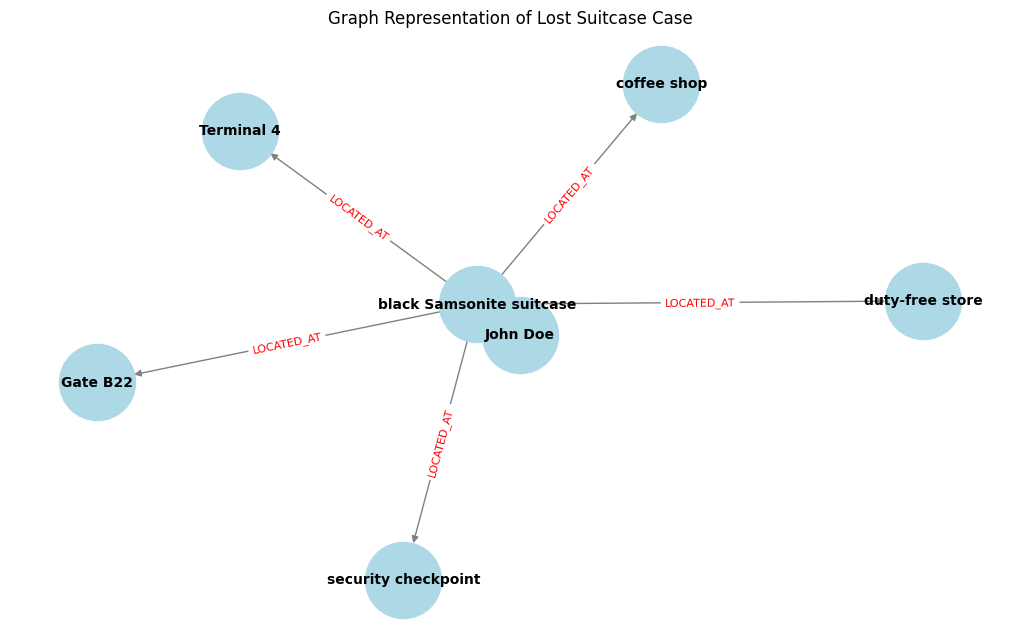

In [17]:
# Visualize the graph
def visualize_graph(graph):
    plt.figure(figsize=(10, 6))
    pos = nx.spring_layout(graph._graph)
    labels = nx.get_edge_attributes(graph._graph, 'relation')
    nx.draw(graph._graph, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=3000, font_size=10, font_weight='bold')
    nx.draw_networkx_edge_labels(graph._graph, pos, edge_labels=labels, font_size=8, font_color='red')
    plt.title("Graph Representation of Lost Suitcase Case")
    plt.show()

# Call visualization function
visualize_graph(graph)

Allowed Class Names: ['arachnid', 'armadillo', 'bear', 'bird', 'bug', 'butterfly', 'cat', 'coral', 'crocodile', 'crustacean', 'dinosaur', 'dog', 'echinoderms', 'ferret', 'fish', 'flower', 'frog', 'fruit', 'fungus', 'hog', 'lizard', 'marine mammals', 'marsupial', 'mollusk', 'mongoose', 'monotreme', 'person', 'plant', 'primate', 'rabbit', 'rodent', 'salamander', 'shark', 'sloth', 'snake', 'trilobite', 'turtle', 'ungulate', 'vegetable', 'wild cat', 'wild dog', 'accessory', 'aircraft', 'ball', 'boat', 'building', 'clothing', 'container', 'cooking', 'decor', 'electronics', 'fence', 'food', 'furniture', 'hat', 'instrument', 'lab equipment', 'other', 'outdoor scene', 'paper', 'sports equipment', 'technology', 'tool', 'toy', 'train', 'vehicle', 'weapon']
Extracted Nodes:
[('Terminal 4', {'type': 'building'}), ('Black Suitcase', {'type': 'clothing'}), ('Security checkpoint', {'type': 'building'}), ('JFK Airport', {'type': 'building'})]

Extracted Edges:
[('Black Suitcase', 'Security checkpoint'